In [397]:
import dask.dataframe as dd 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [398]:
data=dd.read_csv("../data/application_train.csv").compute()
print(data.shape)

(307511, 122)


In [399]:
data_copy=data.copy()

* Suppression des outliers

In [400]:
data_copy[data_copy['AMT_INCOME_TOTAL'] >40000000]['AMT_INCOME_TOTAL']=np.nan
data_copy[data_copy['DAYS_EMPLOYED']>100000]['DAYS_EMPLOYED']=np.nan
data_copy[data_copy['OWN_CAR_AGE']>50]['OWN_CAR_AGE']=np.nan

* preprocessing

In [401]:
categorical=data_copy.select_dtypes('object').columns

In [402]:
categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [403]:
numeric=list(data_copy.select_dtypes('float').columns.values) + list(data_copy.select_dtypes('int').columns.values)

In [404]:
numeric

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [405]:
# for i in categorical:
#     data_copy[i]=data_copy[i].fillna(data_copy[i].mode()[0])

In [406]:
for i in categorical:
    lc=LabelEncoder()
    data_copy[i]=lc.fit_transform(data_copy[i])

In [407]:
# for i in numeric:
#     data_copy[i]=data_copy[i].fillna(data_copy[i].mean())

In [408]:
negative_days=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

for i in negative_days:
    data_copy[i]=np.abs(data_copy[i])

data_copy['DAYS_BIRTH']=np.round(data_copy['DAYS_BIRTH']/365)
data_copy['DAYS_EMPLOYED']=np.round(data_copy['DAYS_EMPLOYED']/365)

In [409]:
data_copy['EXT_SOURCE']=data_copy[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
data_copy.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1,inplace=True)

In [410]:
numeric.append("EXT_SOURCE")
for i in numeric :
    if i not in ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]:
        rs=RobustScaler()
        data_copy[i]=rs.fit_transform(data_copy[[i]])

In [411]:
data_copy.drop(['TARGET','SK_ID_CURR'],axis=1,inplace=True)

In [412]:
pca = PCA(n_components=5)
data_copy=pca.fit_transform(np.nan_to_num(data_copy))
data_copy.shape

(307511, 5)

In [413]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,random_state=15)
km.fit(data_copy)
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [414]:
list(km.labels_).count(0)

252137

In [373]:
km.cluster_centers_

array([[-1.50494894e+01,  1.57581341e+00,  1.58882655e-02,
        -1.23284573e-03, -4.42426756e-02],
       [ 6.85255374e+01, -7.17522422e+00, -7.23447755e-02,
         5.61357360e-03,  2.01452225e-01]])

In [374]:
transform = TSNE(n_components=2)
X= transform.fit_transform(data_copy)

In [375]:
X.shape

(307511, 2)

In [376]:
import pandas as pd
y = pd.DataFrame()
y["x1"]=X[:,0]
y["x2"]=X[:,1]
y['TARGET'] = km.labels_

<AxesSubplot:xlabel='x1', ylabel='x2'>

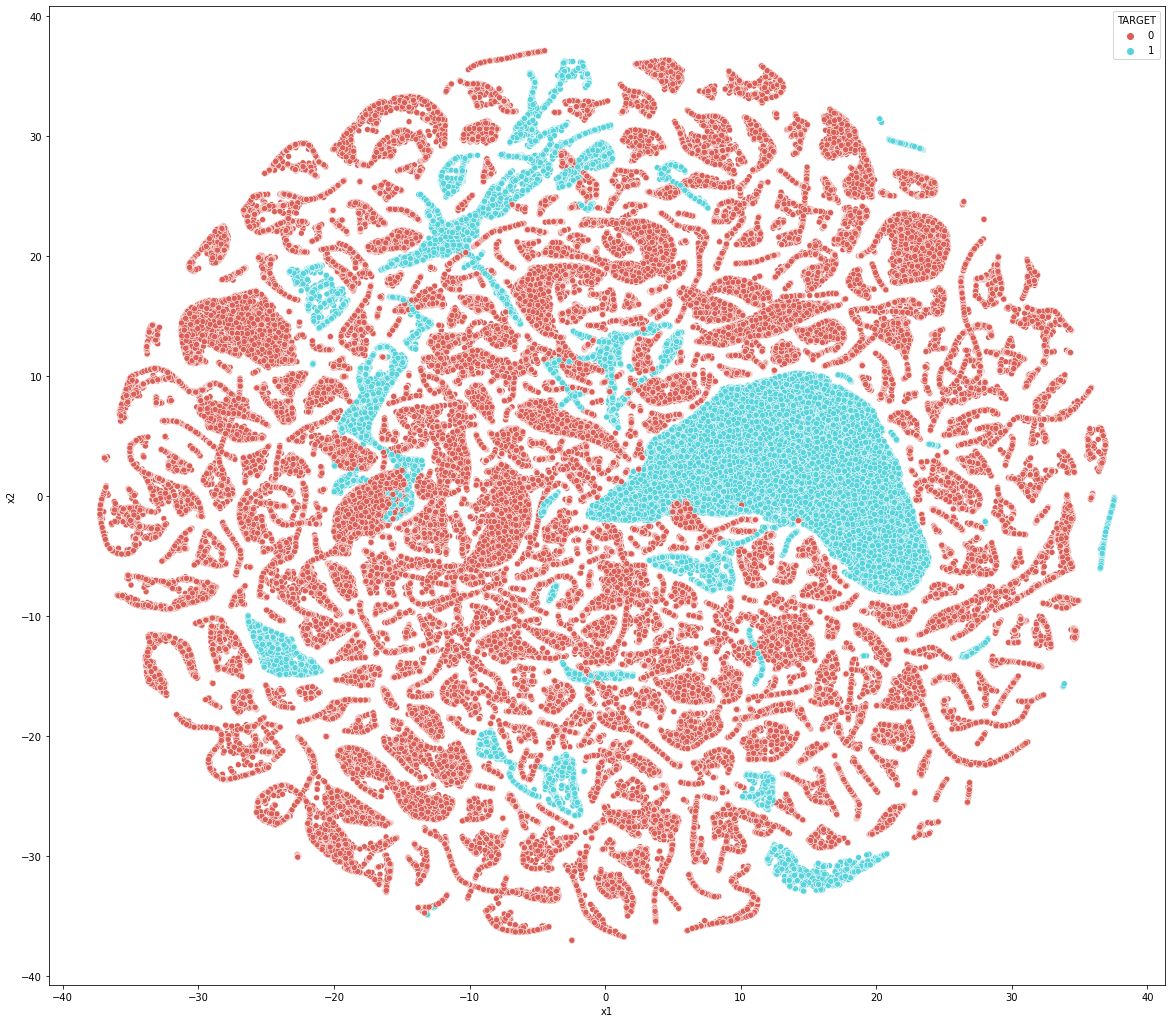

In [377]:
plt.figure(figsize=(20,18))
sns.scatterplot(data=y,x='x1',y='x2',hue='TARGET',palette=sns.color_palette("hls", 2))